In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 实现sigmod函数

In [3]:
def sigmod(value: float) -> float:
    return 1 / (1 + np.exp(-value))


sigmod(0)

0.5

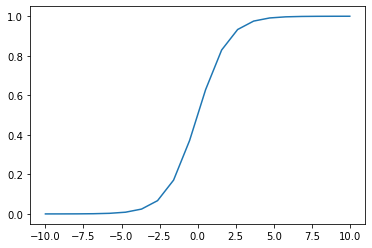

In [9]:
hi = 10
lo = -hi
X = np.linspace(lo, hi, hi - lo)
Y = np.array([sigmod(x) for x in X])
plt.plot(X, Y)
plt.show()

# 实现线性model

In [14]:
def modelFunc(X: np.ndarray, θ: np.ndarray) -> float:
    # 注意theta[1:-1]和theta[1:]的区别:
    # 前者不包括最后一个, 后者包括
    return sigmod(np.dot(X, θ[1:].T) + θ[0])


θ = np.array([1, 2, 3])
X = np.array([2, 3])
modelFunc(X, θ)

0.9999991684719722

# 定义损失函数

In [19]:
def loss(XMatrix: np.ndarray, Y: np.ndarray, θ: np.ndarray) -> float:
    errSum: float = 0
    rowsNum: int = XMatrix.shape[0]
    for i in range(rowsNum):
        X = XMatrix[i]
        y = Y[i]
        # x是行向量, y是标签
        err = -y * np.log(modelFunc(X, θ)) - (1 - y) * np.log(1 - modelFunc(X, θ))
        errSum += err
    return errSum

θ = np.array([1, 2, 3])
X = np.array([[2, 3], [1, 2]])
Y = np.array([0, 1])
print(loss(X, Y, θ))

array([ -9.68002296, -13.68582685])

# 计算梯度

$$\frac { \partial J } { \partial \theta _ { j } } = - \frac { 1 } { m } \sum _ { i = 1 } ^ { n } [ y _ { i } - f _ { \theta } ( x _ { i } ) ] * x _ { i j }$$

(3,)